## Reducción de dimensionalidad para Visualización

In [1]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Dataset
df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })

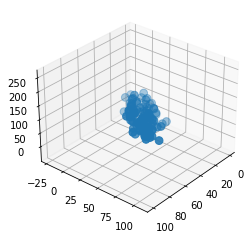

In [3]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], s=60)
ax.view_init(30, 40)
plt.show()

In [4]:
df=pd.DataFrame({'X':(0,0,1,3,5,1,3), 'Y':(6,5,5,4,0,5,4), 'Z':(0,0,5,12,0,0,0), 'color':('red','red','blue','blue','red','blue','blue')})

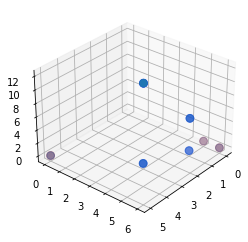

In [5]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c=df['color'], s=60)
ax.scatter(df['X'], df['Y'], df['Z'], s=60)
ax.view_init(30, 40)
plt.show()

In [6]:
data = pd.read_csv('../DataSets/iris_dataset.csv', index_col = 0)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
fila,,,,,
fila1,5.1,3.5,1.4,0.2,setosa
fila2,4.9,3.0,1.4,0.2,setosa
fila3,4.7,3.2,1.3,0.2,setosa
fila4,4.6,3.1,1.5,0.2,setosa
fila5,5.0,3.6,1.4,0.2,setosa


In [7]:
data1 = data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()
data2 = data[['species']].to_numpy()

In [8]:
data1.shape

(150, 4)

In [9]:
data2.shape

(150, 1)

In [10]:
mU, mD, mV = np.linalg.svd(data1)

In [11]:
mU.shape

(150, 150)

In [12]:
mD.shape

(4,)

In [13]:
i = 3
matizresultante = np.matrix(mU[:, :i]) * np.diag(mD[:i])# * np.matrix(mV[:i, :])

In [14]:
matizresultante.shape

(150, 3)

In [15]:
print("Matriz ", i, ":\n",matizresultante)

Matriz  3 :
 [[-5.91220352e+00  2.30344211e+00 -1.93713090e-04]
 [-5.57207573e+00  1.97383104e+00  2.37434025e-01]
 [-5.44648470e+00  2.09653267e+00  8.01625378e-03]
 [-5.43601924e+00  1.87168085e+00  1.46324095e-02]
 [-5.87506555e+00  2.32934799e+00 -1.17638590e-01]
 [-6.47699043e+00  2.32552598e+00 -2.44852300e-01]
 [-5.51542859e+00  2.07156181e+00 -2.36432994e-01]
 [-5.85042297e+00  2.14948016e+00  1.18944252e-02]
 [-5.15851287e+00  1.77642658e+00  5.52246336e-02]
 [-5.64458172e+00  1.99190598e+00  2.18489433e-01]
 [-6.26482670e+00  2.42727947e+00  9.15644083e-03]
 [-5.75150446e+00  2.02142409e+00 -9.34623134e-02]
 [-5.48017099e+00  1.97972378e+00  2.41521536e-01]
 [-4.95064168e+00  2.04947793e+00  8.22559362e-03]
 [-6.52528515e+00  2.91774840e+00  2.28344041e-02]
 [-6.78960484e+00  2.82549990e+00 -4.21593695e-01]
 [-6.27173006e+00  2.60908548e+00 -2.22964370e-01]
 [-5.92899145e+00  2.26896626e+00 -5.42236024e-02]
 [-6.64757408e+00  2.39126214e+00  2.65072218e-02]
 [-6.09424306e+00 

In [16]:
x1 = np.squeeze(np.asarray(matizresultante[:,0]))

In [17]:
x2 = np.squeeze(np.asarray(matizresultante[:,1]))

In [18]:
x3 = np.squeeze(np.asarray(matizresultante[:,2]))

In [19]:
y = data2[:,0]

In [20]:
y.shape

(150,)

In [21]:
x1.shape

(150,)

In [22]:
color = ['red', 'green', 'blue']

In [23]:
data_svd = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'y':y})
# df.plot('x', 'y', kind='scatter')

In [24]:
data_svd.head()

,x1,x2,x3,y
0,-5.912204,2.303442,-0.000194,setosa
1,-5.572076,1.973831,0.237434,setosa
2,-5.446485,2.096533,0.008016,setosa
3,-5.436019,1.871681,0.014632,setosa
4,-5.875066,2.329348,-0.117639,setosa


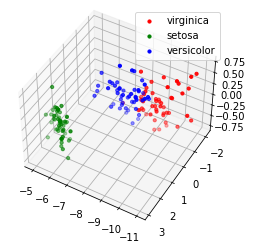

In [25]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i = 0
for especie in ['virginica', 'setosa', 'versicolor']:
    ax.scatter(data_svd[data_svd.y == especie]['x1'],
               data_svd[data_svd.y == especie]['x2'],
               data_svd[data_svd.y == especie]['x3'],
               c=color[i], s=10, label=especie)
    i = i + 1

ax.view_init(45, 120)
ax.legend()
plt.show()